# Transfer Learning Project with Cats vs Dogs Dataset

This project was developed as part of the practical activity for the **Digital Innovation One (DIO)** course, in the challenge:

> **Transfer Learning Project in Python**

---

## Introduction

The proposal involves applying **Transfer Learning** using a convolutional neural network (CNN) in **Python**, either in the **Google Colab** environment or locally with Keras/TensorFlow libraries, as I used myself.

In this project, I used the famous **"Cats vs Dogs" image dataset**, available from the [Microsoft repository](https://www.microsoft.com/en-us/download/details.aspx?id=54765).

---

## Project Objective

Train two models to classify images between **cats** and **dogs**:

1. **Base Model (from scratch)**  
   Convolutional neural network built from scratch with `Conv2D`, `MaxPooling2D`, `Dropout` and `Dense`.

2. **Transfer Learning Model**  
   Using the **VGG16** model pre-trained on the ImageNet dataset. The last layer is replaced to perform binary classification (cat or dog), and the rest of the network is frozen.

---

## Practical Applications

This project was designed to demonstrate how neural networks are applied in visual classification systems. This type of model can serve as a basis for systems that verify images like CAPTCHAs, which distinguish humans from bots.

---

## Technologies Used

- Python 3.10
- TensorFlow / Keras  
- Matplotlib and NumPy  
- Google Colab (or local Jupyter Notebook)  
- Dataset: [Cats vs Dogs - Microsoft Research](https://www.microsoft.com/en-us/download/details.aspx?id=54765)

---

## Code Structure

- Dataset extraction and reading
- Normalization, resizing and labeling
- Data split into training, validation and test sets
- Building a base model from scratch
- Applying Transfer Learning with VGG16 architecture
- Model training and evaluation
- Metric visualization and performance charts
- Prediction testing with individual images

---

## Expected Results

After training both models, charts are generated comparing **accuracy** and **validation loss**, demonstrating how **Transfer Learning** can accelerate and improve network performance, even with limited data volume.

---

## How to Run

1. Download the dataset at: [https://www.microsoft.com/en-us/download/details.aspx?id=54765](https://www.microsoft.com/en-us/download/details.aspx?id=54765)  
2. Extract the files and set the correct path in the script.
3. Run the code in [Google Colab](https://colab.research.google.com/) or your local environment.
4. View the results and test with any image you want.

---

## References

This project is a practical activity from the **Digital Innovation One (DIO)** course:  
[https://github.com/digitalinnovationone](https://github.com/digitalinnovationone)

In [ ]:
%matplotlib inline
import os
import random
import numpy as np
import keras
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import kagglehub
from kagglehub import KaggleDatasetAdapter

from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Model
from keras.utils import to_categorical


In [13]:
import zipfile

zip_path = r"C:\Users\Ruanj\OneDrive\Documentos\DIO\kagglecatsanddogs_5340.zip"
extract_path = r"C:\Users\Ruanj\OneDrive\Documentos\DIO\kagglecatsanddogs_5340"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [15]:
root = os.path.join(extract_path, "PetImages")
print(f"root = {root}")

train_split, val_split = 0.7, 0.15

def get_image(path):
    try:
        img = image.load_img(path, target_size=(224, 224))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)
        return img, x
    except Exception as e:
        print(f"Erro ao carregar imagem {path}: {e}")
        return None, None


root = C:\Users\Ruanj\OneDrive\Documentos\DIO\kagglecatsanddogs_5340\PetImages


In [16]:
# Load dataset
categories = [os.path.join(root, 'Cat'), os.path.join(root, 'Dog')]
num_classes = len(categories)
data = []

for c, category in enumerate(categories):
    images = [os.path.join(dp, f) for dp, dn, filenames in os.walk(category)
              for f in filenames if os.path.splitext(f)[1].lower() in ['.jpg', '.png', '.jpeg']]
    
    for img_path in images:
        img, x = get_image(img_path)
        if x is not None:
            data.append({'x': np.array(x[0]), 'y': c})

random.shuffle(data)

Erro ao carregar imagem C:\Users\Ruanj\OneDrive\Documentos\DIO\kagglecatsanddogs_5340\PetImages\Cat\666.jpg: cannot identify image file <_io.BytesIO object at 0x00000173413297B0>
Erro ao carregar imagem C:\Users\Ruanj\OneDrive\Documentos\DIO\kagglecatsanddogs_5340\PetImages\Dog\11702.jpg: cannot identify image file <_io.BytesIO object at 0x000001734C14ECA0>


c:\Users\Ruanj\AppData\Local\Programs\Python\Python310\lib\site-packages\PIL\TiffImagePlugin.py:950: UserWarning: Truncated File Read
  warnings.warn(str(msg))


In [17]:
idx_val = int(train_split * len(data))
idx_test = int((train_split + val_split) * len(data))
train = data[:idx_val]
val = data[idx_val:idx_test]
test = data[idx_test:]

x_train = np.array([t["x"] for t in train])
y_train = [t["y"] for t in train]
x_val = np.array([t["x"] for t in val])
y_val = [t["y"] for t in val]
x_test = np.array([t["x"] for t in test])
y_test = [t["y"] for t in test]


In [18]:
x_train = x_train.astype('float32') / 255.
x_val = x_val.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

y_train = to_categorical(y_train, num_classes)
y_val = to_categorical(y_val, num_classes)
y_test = to_categorical(y_test, num_classes)

print("\nResumo do dataset:")
print("Total de imagens carregadas:", len(data))
print("Treino / Validação / Teste:", len(x_train), len(x_val), len(x_test))
print("Formato imagens:", x_train.shape)


Resumo do dataset:
Total de imagens carregadas: 24998
Treino / Validação / Teste: 17498 3750 3750
Formato imagens: (17498, 224, 224, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.4850196..0.5923961].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.45795685..0.47867057].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.4850196..0.5923961].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.4850196..0.5923961].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.48109803..0.5923961].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.46149018..0.5923961].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.43

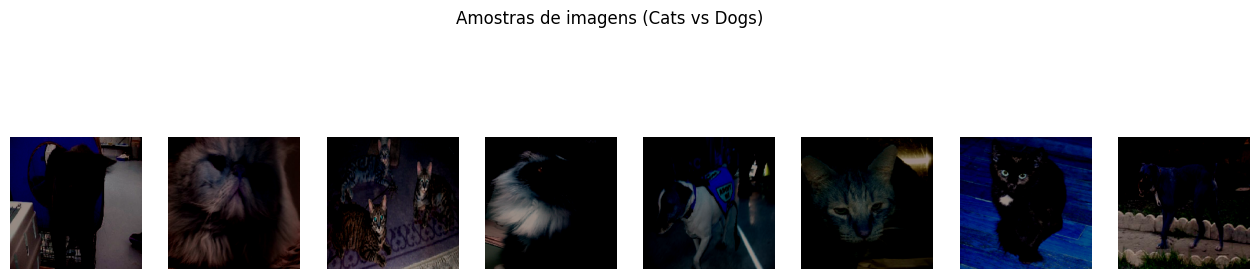

In [19]:
plt.figure(figsize=(16, 4))
sample_images = random.sample(data, 8)
for i, sample in enumerate(sample_images):
    plt.subplot(1, 8, i + 1)
    plt.imshow(sample['x'] / 255.)
    plt.axis('off')
plt.suptitle("Amostras de imagens (Cats vs Dogs)")
plt.show()

In [20]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()


c:\Users\Ruanj\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 222, 222, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 109, 109, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 54, 54, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 52, 52, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 43264)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     2,768,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 2)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,797,730 (10.67 MB)

 Trainable params: 2,797,730 (10.67 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
history = model.fit(x_train, y_train,
                    batch_size=32,
                    epochs=10,
                    validation_data=(x_val, y_val))

Epoch 1/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 132s 234ms/step - accuracy: 0.5994 - loss: 0.6623 - val_accuracy: 0.7107 - val_loss: 0.5532
Epoch 2/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 114s 207ms/step - accuracy: 0.7240 - loss: 0.5453 - val_accuracy: 0.7555 - val_loss: 0.4952
Epoch 3/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 121s 221ms/step - accuracy: 0.7834 - loss: 0.4707 - val_accuracy: 0.7853 - val_loss: 0.4540
Epoch 4/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 121s 222ms/step - accuracy: 0.8219 - loss: 0.4000 - val_accuracy: 0.8101 - val_loss: 0.4323
Epoch 5/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 118s 217ms/step - accuracy: 0.8464 - loss: 0.3480 - val_accuracy: 0.8037 - val_loss: 0.4242
Epoch 6/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 119s 217ms/step - accuracy: 0.8713 - loss: 0.3064 - val_accuracy: 0.8080 - val_loss: 0.4252
Epoch 7/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 129s 236ms/step - accuracy: 0.8891 - loss: 0.2570 - val_accuracy: 0.8093 - val_loss: 0.4843
Epoch 8/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 119s 217ms/step - accuracy: 0.9083 -

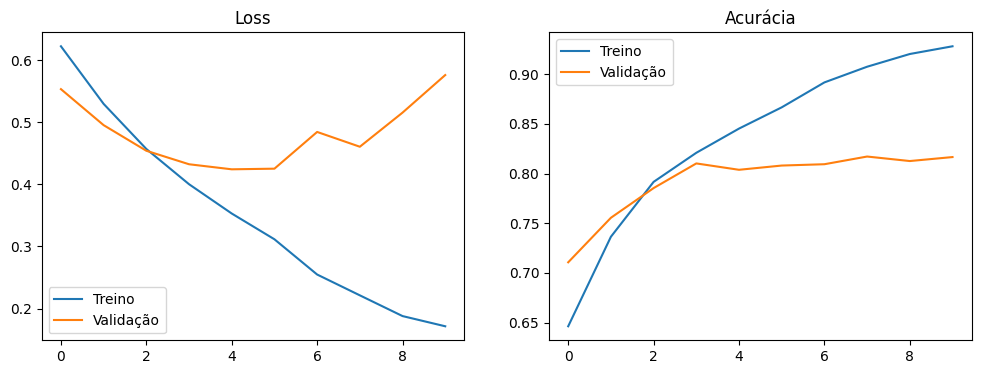


Modelo Base - Loss: 0.5453, Acurácia: 0.8205


In [22]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Treino')
plt.plot(history.history['val_loss'], label='Validação')
plt.title('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Treino')
plt.plot(history.history['val_accuracy'], label='Validação')
plt.title('Acurácia')
plt.legend()
plt.show()

loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"\nModelo Base - Loss: {loss:.4f}, Acurácia: {accuracy:.4f}")


In [24]:
from keras.applications import VGG16


In [25]:

# 10. Transfer Learning com VGG16
vgg = VGG16(weights='imagenet', include_top=True)
inp = vgg.input
out = Dense(num_classes, activation='softmax')(vgg.layers[-2].output)
model_new = Model(inp, out)

for layer in model_new.layers[:-1]:
    layer.trainable = False

model_new.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

model_new.summary()


553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 18s 0us/step


Model: "functional_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │         8,194 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 134,268,738 (512.19 MB)

 Trainable params: 8,194 (32.01 KB)

 Non-trainable params: 134,260,544 (512.16 MB)

In [26]:
history2 = model_new.fit(x_train, y_train,
                         batch_size=32,
                         epochs=10,
                         validation_data=(x_val, y_val))

Epoch 1/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 1401s 3s/step - accuracy: 0.8183 - loss: 0.4041 - val_accuracy: 0.9035 - val_loss: 0.2211
Epoch 2/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 1376s 3s/step - accuracy: 0.9022 - loss: 0.2247 - val_accuracy: 0.9133 - val_loss: 0.1994
Epoch 3/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 1385s 3s/step - accuracy: 0.9150 - loss: 0.1989 - val_accuracy: 0.9187 - val_loss: 0.1881
Epoch 4/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 1381s 3s/step - accuracy: 0.9119 - loss: 0.2030 - val_accuracy: 0.9229 - val_loss: 0.1797
Epoch 5/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 1383s 3s/step - accuracy: 0.9217 - loss: 0.1895 - val_accuracy: 0.9251 - val_loss: 0.1815
Epoch 6/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 1381s 3s/step - accuracy: 0.9227 - loss: 0.1803 - val_accuracy: 0.9219 - val_loss: 0.1965
Epoch 7/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 1377s 3s/step - accuracy: 0.9324 - loss: 0.1655 - val_accuracy: 0.9267 - val_loss: 0.1801
Epoch 8/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 1374s 3s/step - accuracy: 0.9254 - loss: 0.1754 - 

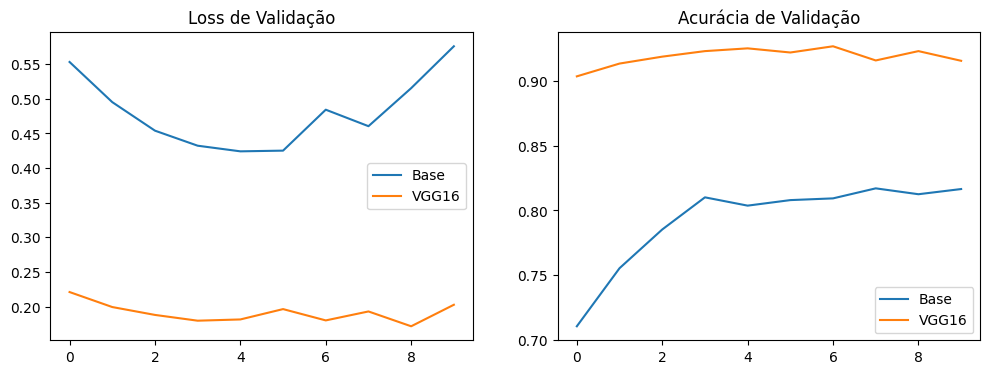


Transfer Learning - Loss: 0.1933, Acurácia: 0.9163


In [27]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['val_loss'], label='Base')
plt.plot(history2.history['val_loss'], label='VGG16')
plt.title('Loss de Validação')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['val_accuracy'], label='Base')
plt.plot(history2.history['val_accuracy'], label='VGG16')
plt.title('Acurácia de Validação')
plt.legend()
plt.show()

loss, accuracy = model_new.evaluate(x_test, y_test, verbose=0)
print(f"\nTransfer Learning - Loss: {loss:.4f}, Acurácia: {accuracy:.4f}")

In [28]:
def predict_image(img_path):
    img, x = get_image(img_path)
    if img:
        plt.imshow(img)
        plt.axis('off')
        plt.show()
        x = x.astype('float32') / 255.
        pred = model_new.predict(x)
        idx = np.argmax(pred)
        conf = pred[0][idx]
        label = 'Cat' if idx == 0 else 'Dog'
        print(f'Predição: {label} ({conf*100:.2f}%)')
    else:
        print("Erro ao carregar imagem")


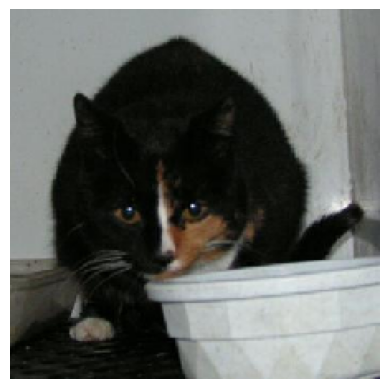

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
Predição: Cat (95.51%)


In [37]:
test_img = os.path.join(root, 'cat', '2201.jpg')
if os.path.exists(test_img):
    predict_image(test_img)
else:
    print("Imagem de teste não encontrada.")